In [36]:
!pip install ta


Defaulting to user installation because normal site-packages is not writeable


In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD
import os


In [38]:
# Load Apple stock data
df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
df.dropna(inplace=True)

# Display first few rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


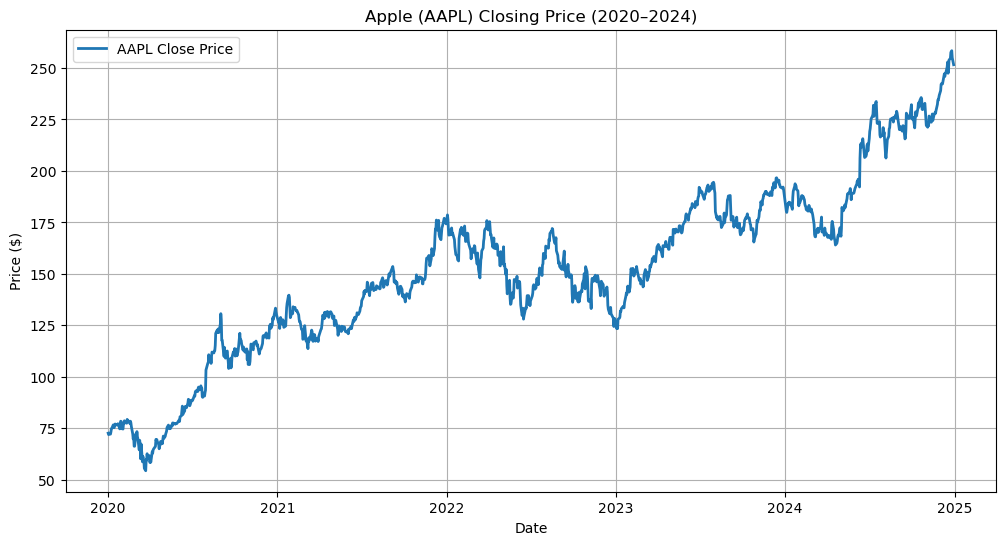

In [39]:

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Close Price', linewidth=2)
plt.title("Apple (AAPL) Closing Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


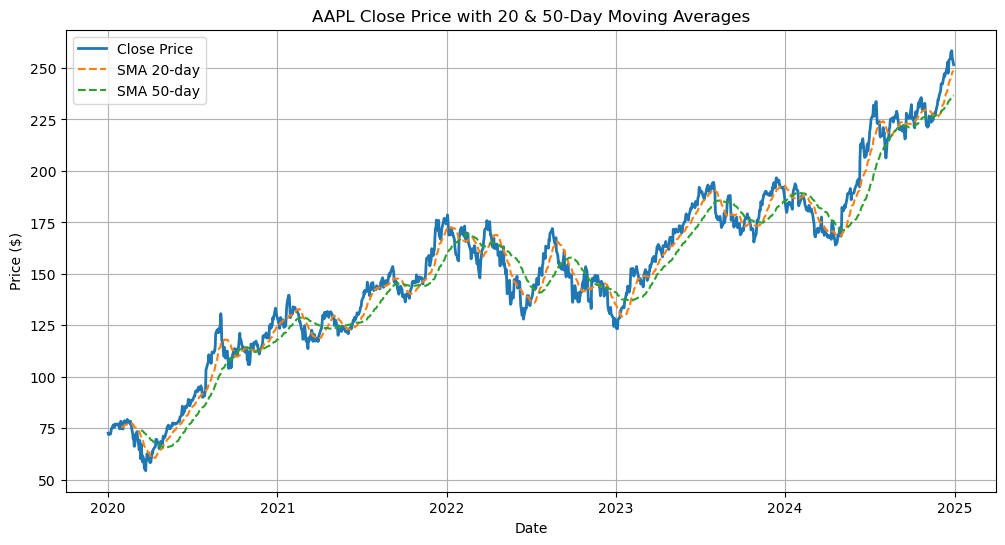

In [40]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', linewidth=2)
plt.plot(df['SMA20'], label='SMA 20-day', linestyle='--')
plt.plot(df['SMA50'], label='SMA 50-day', linestyle='--')
plt.title("AAPL Close Price with 20 & 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


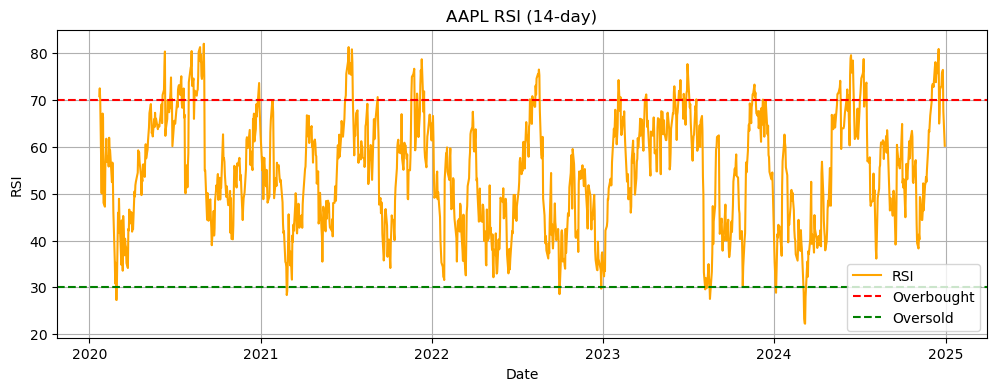

In [41]:

rsi = RSIIndicator(close=df['Close'].squeeze(), window=14)
df['RSI'] = rsi.rsi()

plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title("AAPL RSI (14-day)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()


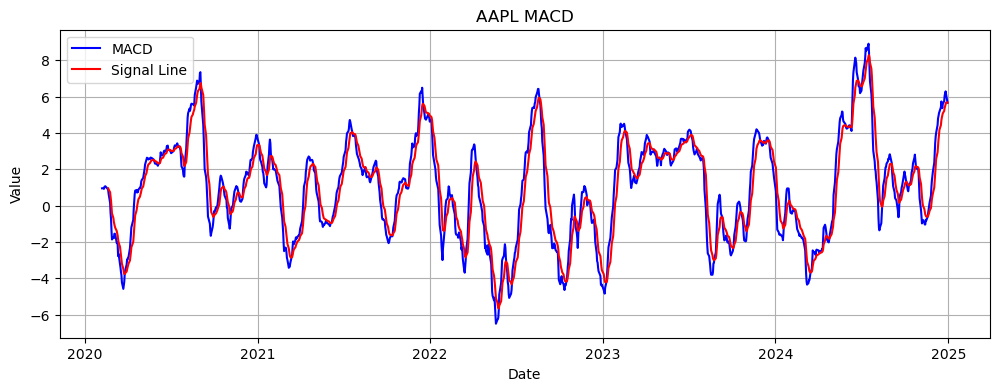

In [42]:

macd = MACD(close=df['Close'].squeeze())
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

plt.figure(figsize=(12, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
plt.title("AAPL MACD")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,RSI,MACD,MACD_Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800,NaN,NaN,NaN,NaN,NaN
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,NaN,NaN,NaN
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,NaN,NaN,NaN
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,NaN,NaN,NaN,NaN,NaN


In [44]:
# Shift the 'Close' column by -1 to get next day's price
df[('Close_Next_Day')] = df[('Close', 'AAPL')].shift(-1)
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,RSI,MACD,MACD_Signal,Close_Next_Day
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,NaN,NaN,NaN,NaN,NaN,71.914833
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800,NaN,NaN,NaN,NaN,NaN,72.487839
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,NaN,NaN,NaN,72.146935
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,NaN,NaN,NaN,73.307518
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,NaN,NaN,NaN,NaN,NaN,74.864632


In [45]:
# Create the target column
df['Target'] = (df[('Close_Next_Day', '')] > df[('Close', 'AAPL')]).astype(int)
df.head()


Price,Close,High,Low,Open,Volume,SMA20,SMA50,RSI,MACD,MACD_Signal,Close_Next_Day,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,NaN,NaN,NaN,NaN,NaN,71.914833,0
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800,NaN,NaN,NaN,NaN,NaN,72.487839,1
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,NaN,NaN,NaN,72.146935,0
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,NaN,NaN,NaN,73.307518,1
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,NaN,NaN,NaN,NaN,NaN,74.864632,1


In [46]:
# 1 = Up, 0 = Down
df['Target_Label'] = df[('Target'), ''].map({1: 'Up', 0: 'Down'})

# Drop the last row since it has NaN in Close_Next_Day
df.dropna(inplace=True)

# Preview
#df[['Close', 'Close_Next_Day', 'Target', 'Target_Label']].head()
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,RSI,MACD,MACD_Signal,Close_Next_Day,Target,Target_Label
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2020-03-13,67.369133,67.841740,61.305256,64.199052,370732000,70.923007,74.025908,45.241583,-2.653158,-2.030566,58.702312,0,Down
2020-03-16,58.702312,62.790941,58.166693,58.639296,322423600,69.920359,73.747537,36.847040,-3.215642,-2.267581,61.283466,1,Up
2020-03-17,61.283466,62.434679,57.778921,59.986832,324056000,69.118871,73.534910,40.394245,-3.413785,-2.496822,59.783241,0,Down
2020-03-18,59.783241,60.590305,57.468691,58.110950,300233600,68.186387,73.280818,39.022312,-3.649798,-2.727417,59.325176,0,Down
2020-03-19,59.325176,61.278607,58.799253,59.957739,271857200,67.271232,73.024383,38.591331,-3.829657,-2.947865,55.558887,0,Down


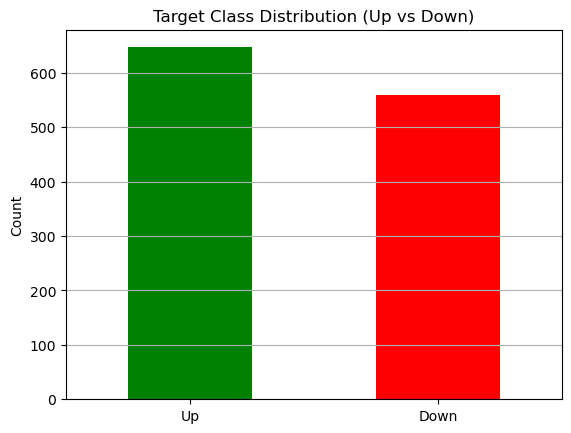

In [47]:
df['Target_Label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Target Class Distribution (Up vs Down)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [48]:
# Drop columns we don’t want in training
features_to_drop = ['Open', 'High', 'Low', 'Volume', 
                    'Close_Next_Day', 'Target_Label', 'Close']

# Drop and get features and target
features = df.drop(columns=features_to_drop)
X = features.drop(columns='Target')
y = features['Target']

X.head()


Price,SMA20,SMA50,RSI,MACD,MACD_Signal
Ticker,,,,,
Date,,,,,
2020-03-13,70.923007,74.025908,45.241583,-2.653158,-2.030566
2020-03-16,69.920359,73.747537,36.847040,-3.215642,-2.267581
2020-03-17,69.118871,73.534910,40.394245,-3.413785,-2.496822
2020-03-18,68.186387,73.280818,39.022312,-3.649798,-2.727417
2020-03-19,67.271232,73.024383,38.591331,-3.829657,-2.947865


In [52]:
y.head()

Date
2020-03-13    0
2020-03-16    1
2020-03-17    0
2020-03-18    0
2020-03-19    0
Name: Target, dtype: int32

In [64]:
os.makedirs('../stock-price-prediction/data', exist_ok=True)
os.makedirs('../stock-price-prediction/assets', exist_ok=True)

In [63]:
X.to_csv('../stock-price-prediction/data/features_X.csv', index=True)
y.to_csv('../stock-price-prediction/data/labels_y.csv', index=True)
